In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
'''
Column	Description

Season	Match Season
DateTime	Match Date and Time (yyyy-mm-dd hh:mm:ss)
HomeTeam	Home Team
AwayTeam	Away Team
FTHG	Full Time Home Team Goals
FTAG	Full Time Away Team Goals
FTR	Full Time Result (H=Home Win, D=Draw, A=Away Win)
HTHG	Half Time Home Team Goals
HTAG	Half Time Away Team Goals
HTR	Half Time Result (H=Home Win, D=Draw, A=Away Win)
Referee	Match Referee
HS	Home Team Shots
AS	Away Team Shots
HST	Home Team Shots on Target
AST	Away Team Shots on Target
HC	Home Team Corners
AC	Away Team Corners
HF	Home Team Fouls Committed
AF	Away Team Fouls Committed
HY	Home Team Yellow Cards
AY	Away Team Yellow Cards
HR	Home Team Red Cards
AR	Away Team Red Cards
'''

df = pd.read_csv('results.csv', encoding= 'unicode_escape')

df.head()

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,1993-94,1993-08-14T00:00:00Z,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-94,1993-08-14T00:00:00Z,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-94,1993-08-14T00:00:00Z,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-94,1993-08-14T00:00:00Z,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-94,1993-08-14T00:00:00Z,Man City,Leeds,1,1,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.describe(include='all')

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
count,10804,10804,10804,10804,10804.000000,10804.000000,10804,9880.000000,9880.000000,9880,7980,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000
unique,28,3251,49,49,NaN,NaN,3,NaN,NaN,3,154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1993-94,1994-01-01T00:00:00Z,Man United,Man United,NaN,NaN,H,NaN,NaN,D,M Dean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,462,11,536,536,NaN,NaN,4958,NaN,NaN,4120,503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,1.519160,1.136801,NaN,0.685020,0.498583,NaN,NaN,13.492481,10.604762,6.173935,4.792732,6.102005,4.780201,11.426065,11.934586,1.404762,1.745489,0.063409,0.090476
std,NaN,NaN,NaN,NaN,1.301138,1.132514,NaN,0.836326,0.719065,NaN,NaN,5.245264,4.549672,3.338950,2.795785,3.099814,2.727745,3.787126,3.954527,1.184170,1.268853,0.254774,0.299282
min,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN,10.000000,7.000000,4.000000,3.000000,4.000000,3.000000,9.000000,9.000000,0.000000,1.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,0.000000,0.000000,NaN,NaN,13.000000,10.000000,6.000000,4.000000,6.000000,4.000000,11.000000,12.000000,1.000000,2.000000,0.000000,0.000000
75%,NaN,NaN,NaN,NaN,2.000000,2.000000,NaN,1.000000,1.000000,NaN,NaN,17.000000,13.000000,8.000000,6.000000,8.000000,6.000000,14.000000,14.000000,2.000000,3.000000,0.000000,0.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10804 entries, 0 to 10803
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Season    10804 non-null  object 
 1   DateTime  10804 non-null  object 
 2   HomeTeam  10804 non-null  object 
 3   AwayTeam  10804 non-null  object 
 4   FTHG      10804 non-null  int64  
 5   FTAG      10804 non-null  int64  
 6   FTR       10804 non-null  object 
 7   HTHG      9880 non-null   float64
 8   HTAG      9880 non-null   float64
 9   HTR       9880 non-null   object 
 10  Referee   7980 non-null   object 
 11  HS        7980 non-null   float64
 12  AS        7980 non-null   float64
 13  HST       7980 non-null   float64
 14  AST       7980 non-null   float64
 15  HC        7980 non-null   float64
 16  AC        7980 non-null   float64
 17  HF        7980 non-null   float64
 18  AF        7980 non-null   float64
 19  HY        7980 non-null   float64
 20  AY        7980 non-null   fl

In [5]:
'''
Arsenal, Chelsea, Everton, Liverpool, Manchester United, Tottenham have the highest match at home/away place = 536 times
Barnsley and Blackpool have the fewest match at home/away place = 19 times
'''

print(df[['HomeTeam']].value_counts())
print(df[['AwayTeam']].value_counts())

HomeTeam        
Liverpool           536
Tottenham           536
Chelsea             536
Everton             536
Man United          536
Arsenal             536
Newcastle           498
Aston Villa         479
West Ham            479
Man City            441
Southampton         403
Blackburn           327
Sunderland          304
Leicester           287
Fulham              285
Middlesbrough       266
Bolton              247
West Brom           247
Leeds               232
Crystal Palace      211
Stoke               190
Coventry            156
Norwich             156
Wigan               152
Charlton            152
Wimbledon           137
Sheffield Weds      137
Burnley             133
Birmingham          133
Derby               133
Watford             133
Wolves              133
Swansea             133
Portsmouth          133
QPR                 118
Hull                 95
Bournemouth          95
Ipswich              80
Nott'm Forest        78
Sheffield United     78
Brighton             76

In [6]:
print(df[['FTHG']].sum())
print(df[['FTAG']].sum())
print(df[['FTHG']].value_counts())
print(df[['FTAG']].value_counts())

'''
We can see that Home Team has an advantage on scores than Away Team, 16413 vs 12282 in total goals
On the other hands, Home Team has a significant advantage in 7 scores and more
'''

FTHG    16413
dtype: int64
FTAG    12282
dtype: int64
FTHG
1       3495
2       2623
0       2544
3       1313
4        550
5        188
6         57
7         24
8          7
9          3
dtype: int64
FTAG
1       3738
0       3714
2       2051
3        907
4        289
5         73
6         27
7          3
9          1
8          1
dtype: int64


'\nWe can see that Home Team has an advantage on scores than Away Team, 16413 vs 12282 in total goals\nOn the other hands, Home Team has a significant advantage in 7 scores and more\n'

In [108]:
df[df['FTHG'] >= 8]

# We can see that clubs in Manchester have appear in half of the match (5 times in total 10 times) which full time Home goal >= 8

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,Total_Match_Goals,Comeback
2300,1998-99,1999-02-06T00:00:00Z,Nott'm Forest,Man United,1,8,A,1.0,2.0,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,0
10134,2019-20,2019-10-25T20:00:00Z,Southampton,Leicester,0,9,A,0.0,5.0,A,A Marriner,6.0,25.0,3.0,15.0,2.0,7.0,3.0,12.0,0.0,0.0,1.0,0.0,9,0


Season
1993-94    462
1994-95    462
1995-96    380
1996-97    380
1997-98    380
1998-99    380
1999-00    380
2000-01    380
2001-02    380
2002-03    380
2003-04    380
2004-05    380
2005-06    380
2006-07    380
2007-08    380
2008-09    380
2009-10    380
2010-11    380
2011-12    380
2012-13    380
2013-14    380
2014-15    380
2015-16    380
2016-17    380
2017-18    380
2018-19    380
2019-20    380
2020-21    380
Name: Season, dtype: int64


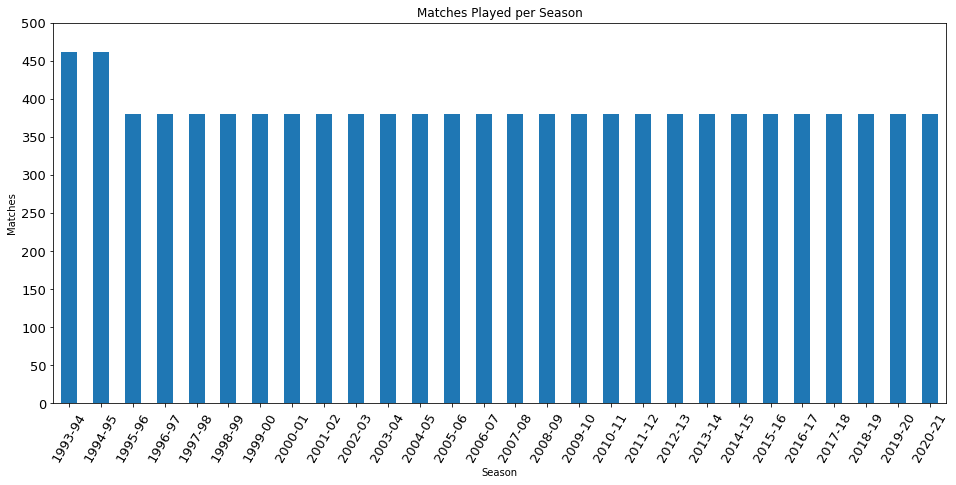

'No. of games in first 2 seasons 1993-94 and 1994-95 are higher than all other seasons. This is beacuase the format of the tournament was changed after 1994-95 Season.'

In [8]:
# Total Games Per Season
print(df.groupby('Season')['Season'].count())
df.groupby('Season')['Season'].count().plot(kind='bar', fontsize=13, figsize=(16,7), yticks=np.arange(0,501,50))

plt.title("Matches Played per Season")
plt.xlabel("Season")
plt.ylabel("Matches")
plt.xticks(rotation=60)
plt.show()

'''No. of games in first 2 seasons 1993-94 and 1994-95 are higher than all other seasons. This is beacuase the format of the tournament was changed after 1994-95 Season.'''

'Observations:\nThe first 2 seasons has 22 teams while rest of the seasons had 20 teams particiapting.\n# This observation concludes why the no. of matches were higher in the first 2 seasons as seen in #1.'

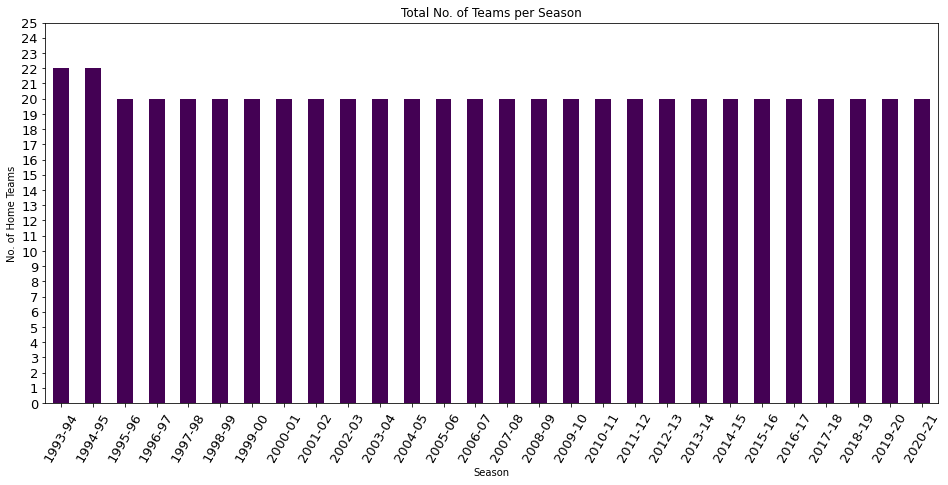

In [9]:
#No. of Teams per season

df.groupby('Season')['HomeTeam'].nunique().plot(kind='bar',colormap='viridis',fontsize=13, figsize=(16,7), yticks=np.arange(0, 26))
plt.ylabel('No. of Home Teams')
plt.title("Total No. of Teams per Season")
plt.xticks(rotation=60)

'''Observations:
The first 2 seasons has 22 teams while rest of the seasons had 20 teams particiapting.
# This observation concludes why the no. of matches were higher in the first 2 seasons as seen in #1.'''

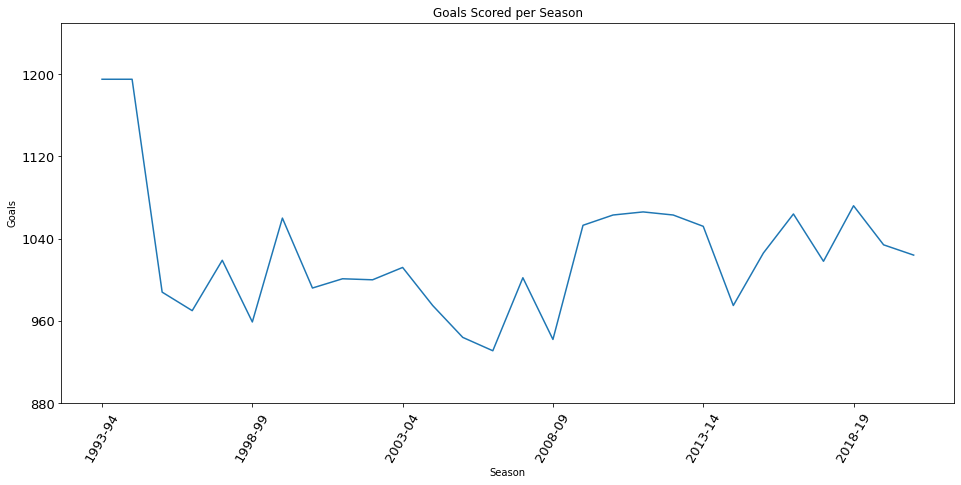

'\nObservations:\nAfter the no. of teams were reduced post 1994-95, most goals were score in the season 2018-19 and least in 2006-07. There is no set pattern observed in the game.\n'

In [10]:
# Goals per Season

df['Total_Match_Goals'] = df['FTHG'] + df['FTAG']

df.groupby('Season')['Total_Match_Goals'].sum().plot(kind='line',fontsize=13,figsize=(16,7),yticks=np.arange(0,1201,80), ylim=(880, 1250)) 

plt.title("Goals Scored per Season")
plt.xlabel("Season")
plt.ylabel("Goals")
plt.xticks(rotation=60)
plt.show()

'''
Observations:
After the no. of teams were reduced post 1994-95, most goals were score in the season 2018-19 and least in 2006-07. There is no set pattern observed in the game.
'''

2.45


'\nObservations\nEven though the total goals in first 2 seasons is higher (due to more teams), the Goals/Game is low. This hints that overall Season Quality in terms of goals was low and possible reason to reduce the teams in the following seasons.\nBest and worst Goals per Game ratio is in accordance with the Total Goals scored i.e. season 2018-19 and 2006-07 respectively.\n'

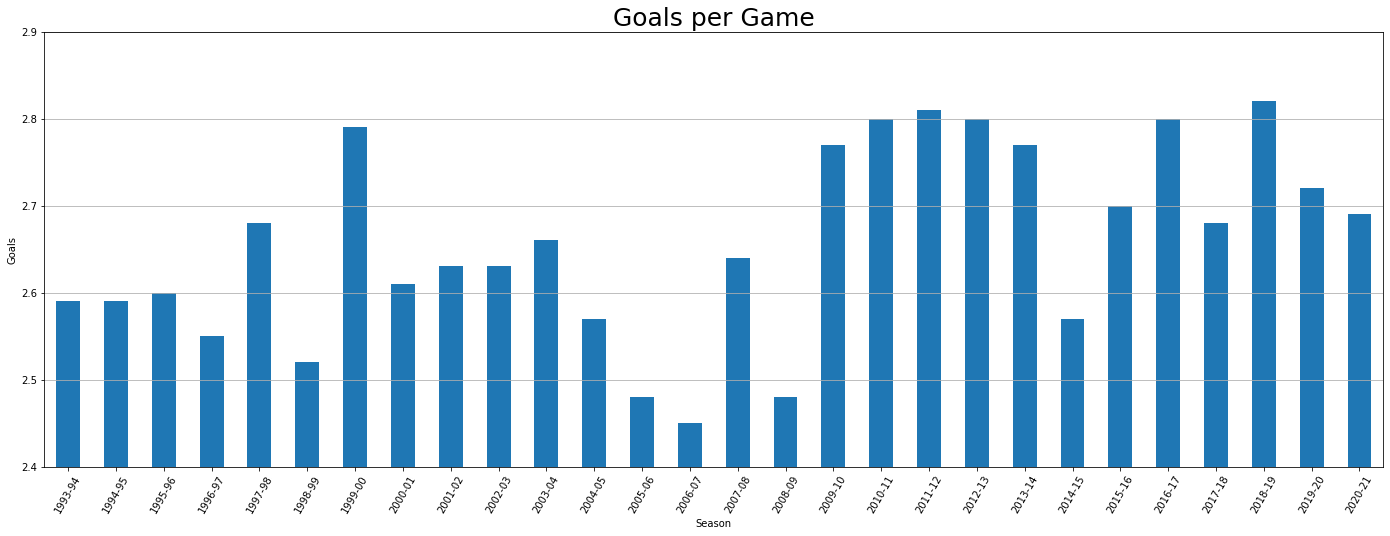

In [11]:
# Goals per Game in a Season

gpm = round(df.groupby('Season')['Total_Match_Goals'].sum() / df.groupby('Season')['Season'].count(), 2)
print(gpm.min())

gpm.plot(kind='bar', width=0.5, figsize=(24,8))

plt.grid(axis='y')
plt.ylim(2.4, 2.9)             ##min value = 2.45 as seen in data [gpm.min()]
plt.ylabel('Goals')
plt.title("Goals per Game", fontsize=25)
plt.xticks(rotation=60)

'''
Observations
Even though the total goals in first 2 seasons is higher (due to more teams), the Goals/Game is low. This hints that overall Season Quality in terms of goals was low and possible reason to reduce the teams in the following seasons.
Best and worst Goals per Game ratio is in accordance with the Total Goals scored i.e. season 2018-19 and 2006-07 respectively.
'''

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text major ticklabel objects>)

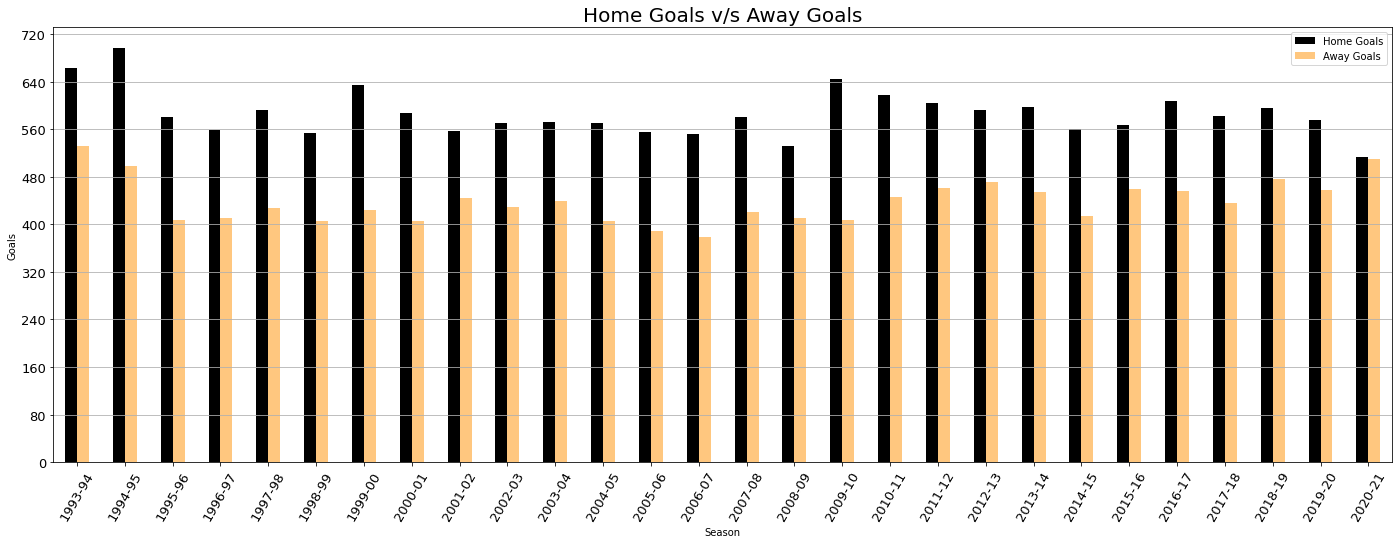

In [50]:
# Distribution of Home and Away Team Goals per Season

df.groupby('Season')[['FTHG','FTAG']].sum().plot(kind='bar',fontsize=13,figsize=(24,8),yticks=np.arange(0,721,80),colormap='copper')
plt.grid(axis='y')
plt.ylabel('Goals')
plt.legend(['Home Goals','Away Goals'])
plt.title("Home Goals v/s Away Goals",fontsize=20)
plt.xticks(rotation=60)

'''We can see that Home Goals has a much larger advantage over the seasons except in 2020-21, 
the reason why season 2020-21 has a similar goals in both home and away team maybe because fans were not allowed to watch live football match due to preventions of COVID-19, 
usually home fans can give a lot of pressure to away team and encourge the home team
'''

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text major ticklabel objects>)

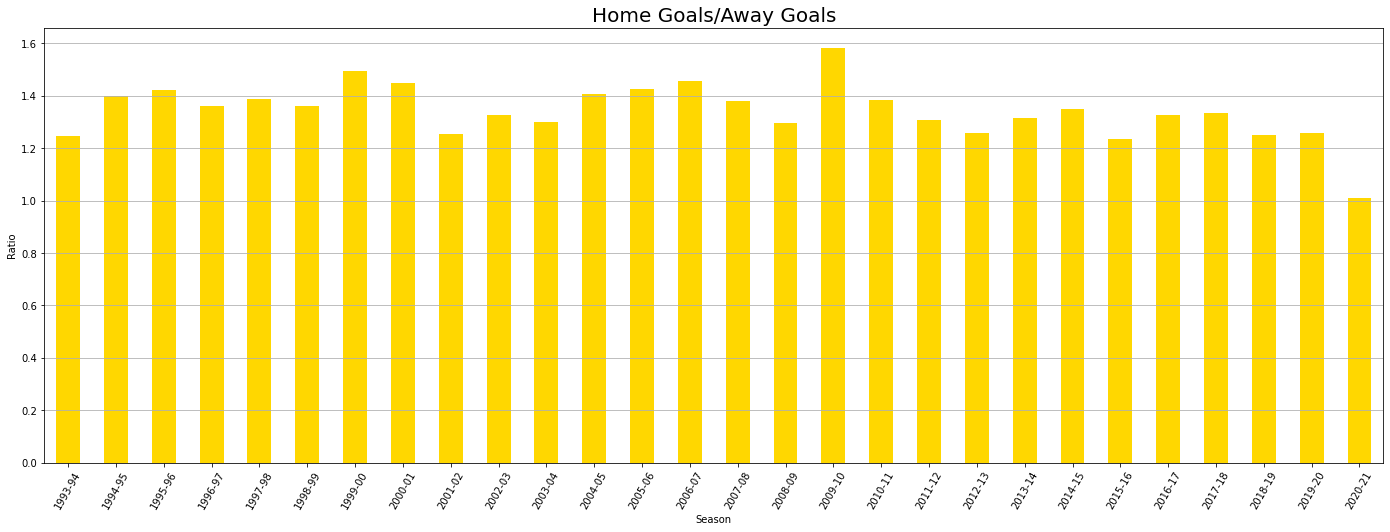

In [71]:
# Ratio of Home Goals to Away Goals per Season

round((df.groupby('Season')['FTHG'].sum()/df.groupby('Season')['FTAG'].sum()),3).plot(kind='bar',figsize=(24,8),color='gold')
plt.grid(axis='y')
plt.ylabel("Ratio")
plt.title("Home Goals/Away Goals",fontsize= 20)
plt.xticks(rotation=60)

'''
Observations :
Best Home/Away Goal ratio is for Season 2009-10
Worst Home/Away Goal ratio is for Season 2020-21, which has only very small value more than 1
'''

    Season              DateTime     HomeTeam  ...  A  D  H
0  1993-94  1993-08-14T00:00:00Z      Arsenal  ...  1  0  0
1  1993-94  1993-08-14T00:00:00Z  Aston Villa  ...  0  0  1
2  1993-94  1993-08-14T00:00:00Z      Chelsea  ...  1  0  0
3  1993-94  1993-08-14T00:00:00Z    Liverpool  ...  0  0  1
4  1993-94  1993-08-14T00:00:00Z     Man City  ...  0  1  0

[5 rows x 27 columns]


'\nWe can see that Away team wins the most in season 2020-21 only, Home team wins the most for the all of past seasons\n'

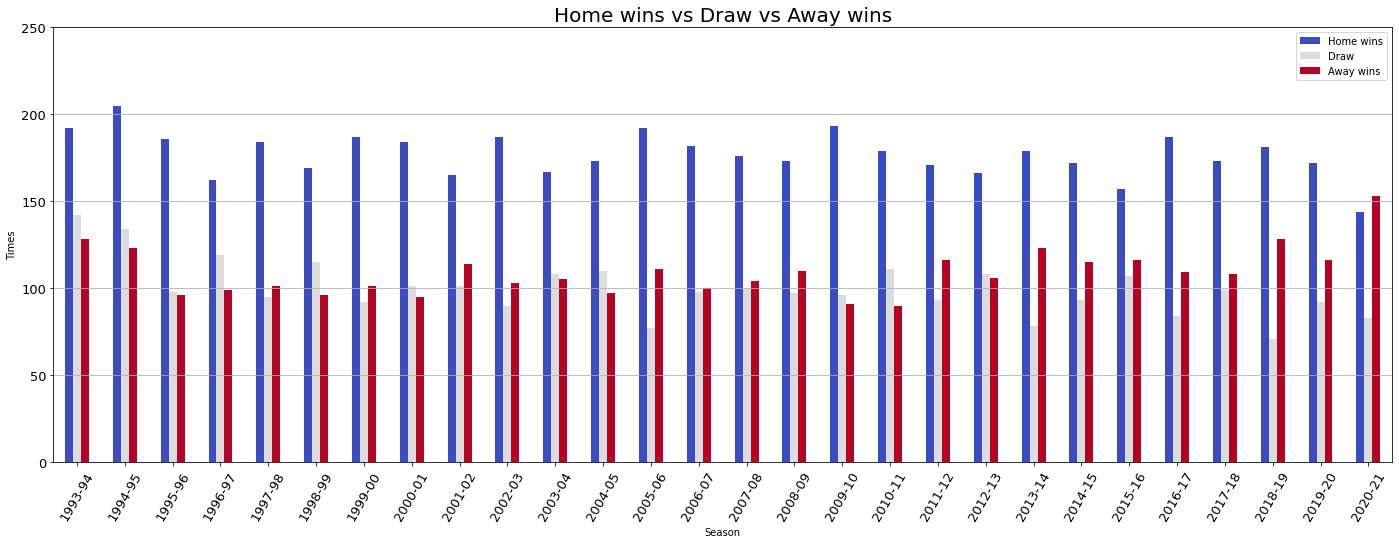

In [66]:
# Distribution of the numbers of Home and Away Team Wins per Season

df_hda = df.copy()
dummy = pd.get_dummies(df_hda['FTR'])
df_hda = pd.concat([df_hda, dummy], axis=1)
print(df_hda.head())

df_hda.groupby('Season')[['H','D', 'A']].sum().plot(kind='bar',fontsize=13,figsize=(24,8),yticks=np.arange(0,251,50),colormap='coolwarm')
plt.grid(axis='y')
plt.ylabel('Times')
plt.legend(['Home wins','Draw', 'Away wins'])
plt.title("Home wins vs Draw vs Away wins",fontsize=20)
plt.xticks(rotation=60)

'''
We can see that Away team wins the most in season 2020-21 only, Home team wins the most for the all of past seasons
'''

"\nWe lose the first 2 seasons' data, so we can ignore these two seasons\nBest Season in terms of comebacks was season 2019-20 (More games where the haltime result was changed) and the worst season was 1998-99\n"

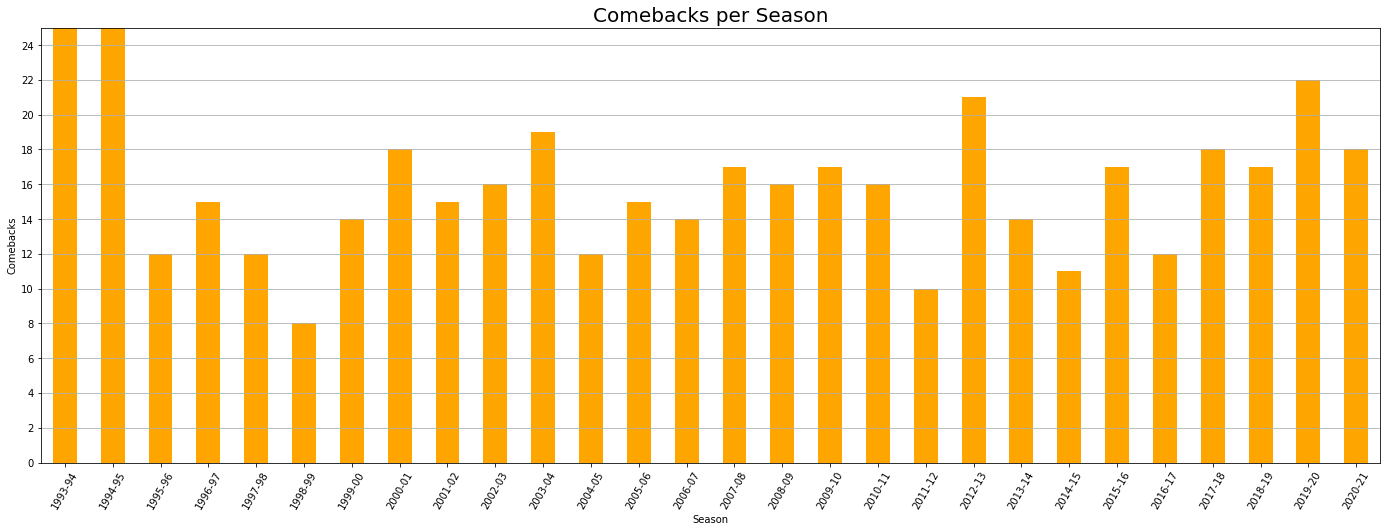

In [85]:
# Comebacks per Seaon

df['Comeback']=np.where((df['FTR']!= df['HTR']) & (df['FTR']!='D') & (df['HTR']!='D'), 1, 0)            # No matter Home or Away comes back

df.groupby('Season')['Comeback'].sum().plot(kind='bar',figsize=(24,8),color='orange',yticks=np.arange(0,28,2))
plt.grid(axis='y')
plt.title("Comebacks per Season",fontsize=20)
plt.ylabel('Comebacks')
plt.ylim(0, 25)
plt.xticks(rotation=60)

'''
We lose the first 2 seasons' data, so we can ignore these two seasons
Best Season in terms of comebacks was season 2019-20 (More games where the haltime result was changed) and the worst season was 1998-99
'''

Text(0.5, 1.0, 'Total Goals by Teams')

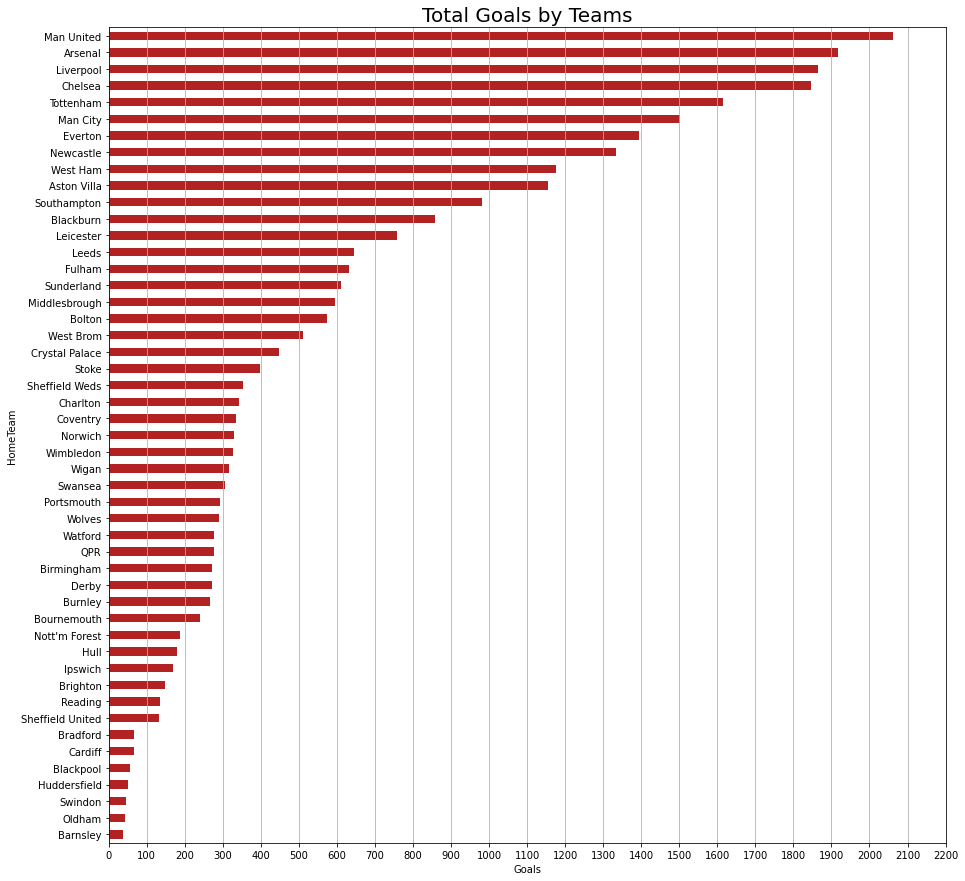

In [95]:
# Total Goals Scored by Each Team over all Season

total_goal = df.groupby('HomeTeam')['FTHG'].sum() + df.groupby('AwayTeam')['FTAG'].sum()
total_goal.sort_values(ascending=True).plot(kind='barh',figsize=(15,15),xticks=np.arange(0,2201,100),color='firebrick')
plt.grid(axis='x')
plt.xlabel("Goals")
plt.title("Total Goals by Teams",fontsize=20)

# Manchester United has the highest goals in PL and barnsley has the fewest goals in PL

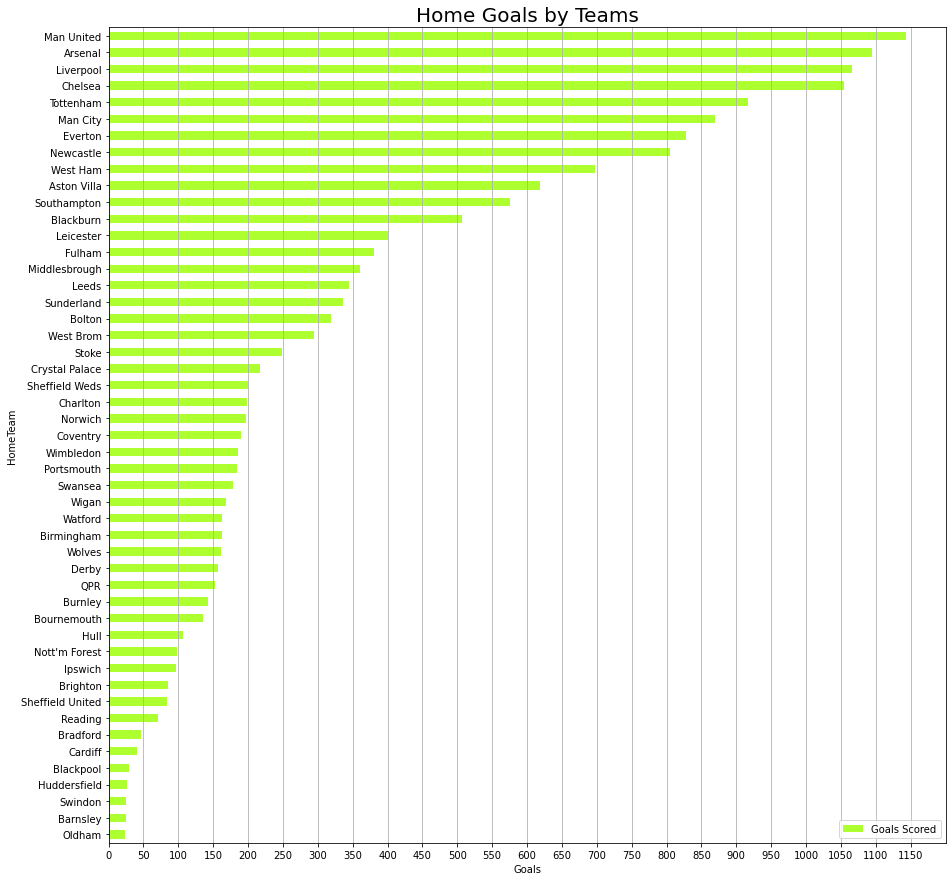

In [101]:
# Home Goals scored by Teams

df.groupby('HomeTeam')['FTHG'].sum().sort_values(ascending=True).plot(kind='barh',figsize=(15,15),xticks=np.arange(0,1151,50),color='greenyellow')
plt.grid(axis='x')
plt.xlabel("Goals")
plt.title("Home Goals by Teams",fontsize=20)
plt.legend(['Goals Scored'])

# Manchester United has the highest home goals in PL and Oldham has the fewest home goals in PL

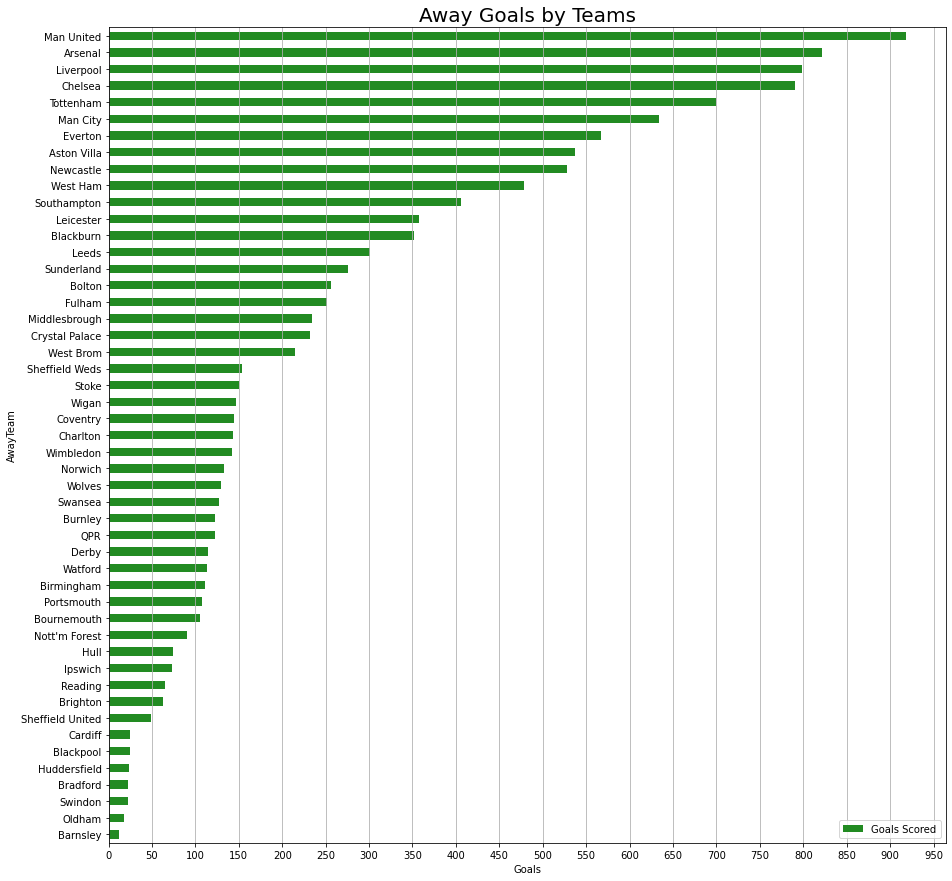

In [107]:
# Away Goals scored by Teams

df.groupby('AwayTeam')['FTAG'].sum().sort_values(ascending=True).plot(kind='barh',figsize=(15,15),xticks=np.arange(0,951,50),color='forestgreen')
plt.grid(axis='x')
plt.xlabel("Goals")
plt.title("Away Goals by Teams",fontsize=20)
plt.legend(['Goals Scored'])

# Manchester United has the highest away goals in PL and barnsley has the fewest away goals in PL

Text(0.5, 1.0, 'Home Comebacks')

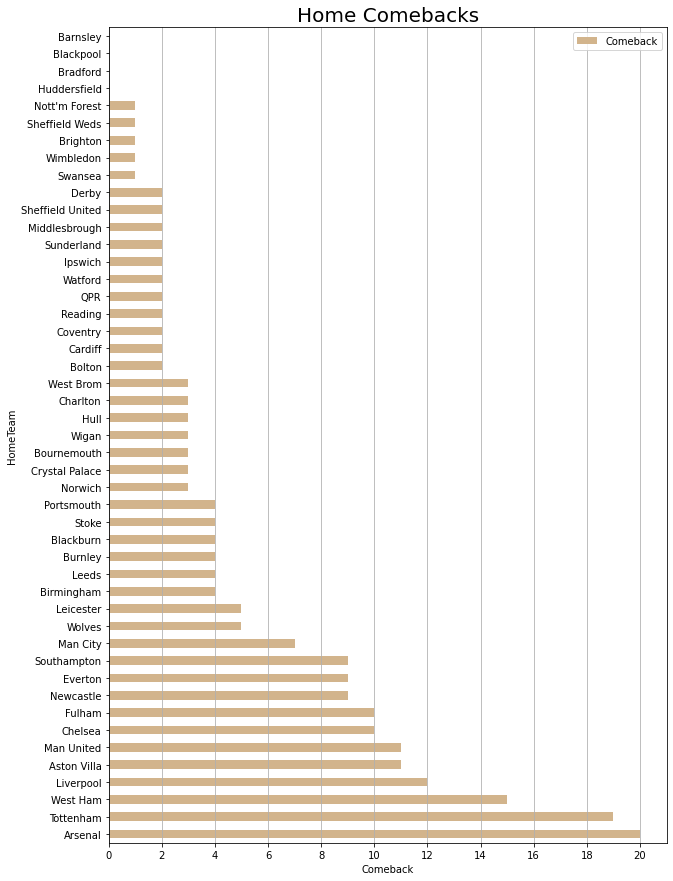

In [112]:
# Home Comebacks

home_cb = df.loc[(df['HTR']=='A')].groupby('HomeTeam')['Comeback'].sum()
home_cb.sort_values(ascending=False).plot(kind='barh',figsize=(10,15),xticks=np.arange(0,21,2),color='tan')
plt.grid(axis='x')
plt.xlabel('Comeback')
plt.legend(['Comeback'])
plt.title("Home Comebacks",fontsize=20)

'''
Observations :
Over the seasons Arsenal has most Home Comebacks of 20 matches which means they went on to win 20 matches at Home when they were trailing at half time.
They are closely followed by Tottenham with 19 matches.
4 clubs, namely : Barnsley, Blackpool, Bradford and Huddersfield have no home comebacks.
'''

Text(0.5, 1.0, 'Away Comebacks')

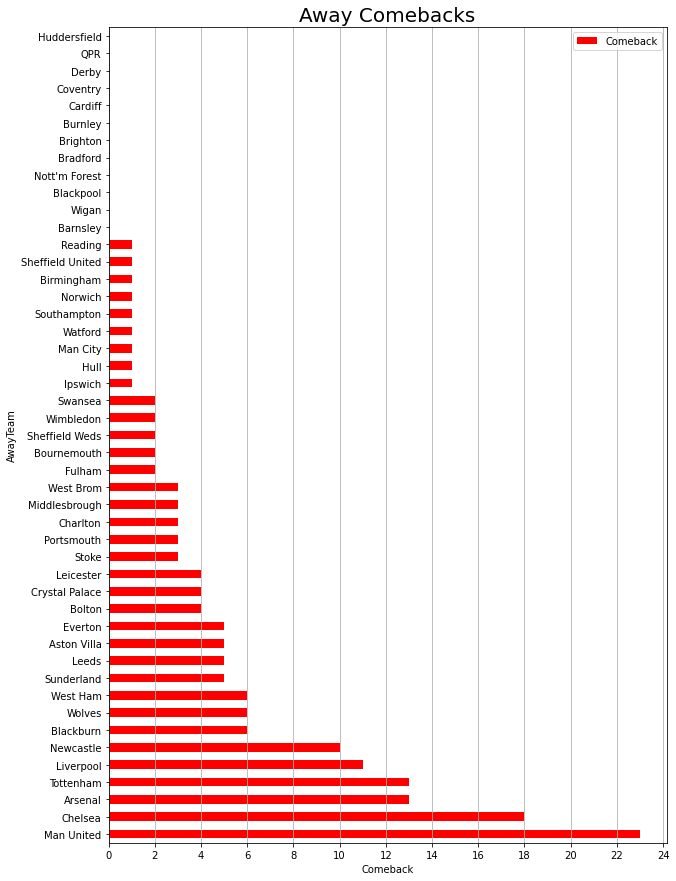

In [115]:
# Away Comebacks

away_cb = df.loc[(df['HTR']=='H')].groupby('AwayTeam')['Comeback'].sum()
away_cb.sort_values(ascending=False).plot(kind='barh',figsize=(10,15),xticks=np.arange(0,25,2),color='red')
plt.grid(axis='x')
plt.xlabel('Comeback')
plt.legend(['Comeback'])
plt.title("Away Comebacks",fontsize=20)

'''
Observations :
Over the seasons Manchester United has most Away Comebacks of 23 matches which means they went on to win 23 matches while Away when they were trailing at half time.
They are followed by Chealsea with 18 matches.
12 clubs never have away comebacks.
'''

In [92]:
# I am a big fan of Manchester United, so I want to analyse more about Manchester United in this project

df_manchester_united = df[(df['HomeTeam'] == 'Man United') | (df['AwayTeam'] == 'Man United')]

df_manchester_united.head(10)

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,Total_Match_Goals,Comeback
10,1993-94,1993-08-15T00:00:00Z,Norwich,Man United,0,2,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1
18,1993-94,1993-08-18T00:00:00Z,Man United,Sheffield United,3,0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1
27,1993-94,1993-08-21T00:00:00Z,Man United,Newcastle,1,1,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0
33,1993-94,1993-08-23T00:00:00Z,Aston Villa,Man United,1,2,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1
52,1993-94,1993-08-28T00:00:00Z,Southampton,Man United,1,3,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1
61,1993-94,1993-09-01T00:00:00Z,Man United,West Ham,3,0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1
68,1993-94,1993-09-11T00:00:00Z,Chelsea,Man United,1,0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
86,1993-94,1993-09-19T00:00:00Z,Man United,Arsenal,1,0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
93,1993-94,1993-09-25T00:00:00Z,Man United,Swindon,4,2,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,1
104,1993-94,1993-10-02T00:00:00Z,Sheffield Weds,Man United,2,3,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,1


In [116]:
print(df_manchester_united[df_manchester_united['HomeTeam'] == 'Man United']['FTR'].value_counts())
print(df_manchester_united[df_manchester_united['AwayTeam'] == 'Man United']['FTR'].value_counts())

df_manchester_united_at_home = df_manchester_united[df_manchester_united['HomeTeam'] == 'Man United']
df_manchester_united_away = df_manchester_united[df_manchester_united['AwayTeam'] == 'Man United']

# To find the win rate at home
win_at_home = 0
draw_at_home = 0
lose_at_home = 0

for x in df_manchester_united_at_home['FTR']:
  if x == 'H':
    win_at_home +=1
  elif x =='D':
    draw_at_home += 1
  else:
    lose_at_home +=1


# To find the win rate while away
win_while_away = 0
draw_while_away = 0
lose_while_away = 0

for x in df_manchester_united_away['FTR']:
  if x == 'A':
    win_while_away +=1
  elif x =='D':
    draw_while_away += 1
  else:
    lose_while_away +=1


print(f'Manchester United has a win rate of {win_at_home / (win_at_home + draw_at_home + lose_at_home)} while Home, and a win rate of {win_while_away / (win_while_away + draw_while_away + lose_while_away)} while away')

H    378
D    100
A     58
Name: FTR, dtype: int64
A    285
D    135
H    116
Name: FTR, dtype: int64
Manchester United has a win rate of 0.7052238805970149 while Home, and a win rate of 0.5317164179104478 while away
